<a href="https://colab.research.google.com/github/sabrinaMKE201073/Bird-Species-Classification-Training-System/blob/main/LESSON_DAY_3_(API_and_LAB_API).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MODULE 5 (SIMPLE API - PART 1)**
- API = Application Program Interface
- function of API: it lets 2 piece of software talk to each other.
- For example, you have your program, some data, & other software components.
Then API is used to communicate with API via input and output.....*italicized text*

The advantages of using APIs:

**Automation**. Less human effort is required and workflows can be easily updated to become faster and more
productive.
**Efficiency.** It allows to use the capabilities of one of the already developed APIs than to try to independently implement some functionality from scratch.
The disadvantage of using APIs:

**Security**. If the API is poorly integrated, it means it will be vulnerable to attacks, resulting in data breeches or losses having financial or reputation implications.

In [ ]:
import pandas as pd

dict_ = {'a':[11,21,31],'b':[12,22,32]}
df = pd.DataFrame(dict_)
df.head()

,a,b
0,11,12
1,21,22
2,31,32


In [ ]:
df.mean()

a    21.0
b    22.0
dtype: float64

- For example, from above line of code, it shows how pandas API is used to process data by communicate with other software component.
- In this example, when u create a dictionary, and then create
a pandas object with the Dataframe constructor, in API lingo, this is an “instance.” .....so, The data in the dictionary is passed along to the pandas API.
- You then use the dataframe to communicate with the API.
- When you call the method **df.head()**, the dataframe communicates with the API, displaying the
first few rows of the dataframe.
- When you call the method **df.mean()**, the API will
calculate the mean and return the values.

**REST API:**

- For example, HTTP method
- 1)	HTTP methods are a way of transmitting data over the internet.
-	We tell the Rest API’s what to do by sending a request.
-	The request is usually communicated via an HTTP message.

- 2)	The HTTP message usually contains a JSON file (which contains instructions for what operation we would like the service to perform)


**NBA API:**

- The API is always being updated from endpoints at NBA.com.

- Sports data is always changing. This is an excellent application of an API

In [ ]:
#NBA API only require 'id'.....no need json file like http method (REST API)
!pip install nba_api
from nba_api.stats.static import teams
nba_teams = teams.get_teams()
nba_teams[:5]


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Georgia',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970},
 {'id': 1610612740,
  'full_name': 'New Orleans Pelicans',
  'abbreviation': 'NOP',
  'nickname': 'Pelicans',
  'city': 'New Orleans',
  'state': 'Louisiana',
  'year_founded': 2002},
 {'id': 1610612741,
  'full_name': 'Chicago Bulls',
  'abbreviation': 'CHI',
  'nickname': 'Bulls',
  'city': 'Chicago',
  'state': 'Illinois',
  'year_founded': 1966}]

In [ ]:
#To make things easier, we convert the dictionart to a table as per below:
def one_dict(list_dict):
  keys = list_dict[0].keys()
  out_dict = {key:[] for key in keys}

  for dict_ in list_dict:
    for key, value in dict_.items():
      out_dict[key].append(value)
  return out_dict

dict_nba_team = one_dict(nba_teams)

df_teams = pd.DataFrame(dict_nba_team)
df_teams.head()


,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Georgia,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [ ]:
df_warriors = df_teams[df_teams['nickname']=='Warriors']
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [ ]:
id_warriors = df_warriors[['id']].values[0][0]
id_warriors
#we got the id number of a world sport team named Warriors
#now, we have integer that can be used to request the Warriors’ information.

1610612744

In [ ]:
from nba_api.stats.endpoints import leaguegamefinder
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable = id_warriors)

In [ ]:
games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,42022,1610612744,GSW,Golden State Warriors,0042200236,2023-05-12,GSW @ LAL,L,241,101,...,0.714,20.0,33.0,53.0,25,3,2,10,30,-21.0
1,42022,1610612744,GSW,Golden State Warriors,0042200235,2023-05-10,GSW vs. LAL,W,239,121,...,0.933,9.0,39.0,48.0,29,8,5,14,18,15.0
2,42022,1610612744,GSW,Golden State Warriors,0042200234,2023-05-08,GSW @ LAL,L,239,101,...,0.750,9.0,31.0,40.0,29,9,2,16,22,-3.0
3,42022,1610612744,GSW,Golden State Warriors,0042200233,2023-05-06,GSW @ LAL,L,240,97,...,0.706,14.0,28.0,42.0,26,5,6,19,22,-30.0
4,42022,1610612744,GSW,Golden State Warriors,0042200232,2023-05-04,GSW vs. LAL,W,242,127,...,0.625,13.0,42.0,55.0,38,2,3,15,23,27.0


In [ ]:
games_home = games[games['MATCHUP']=='GSW vs. LAL'] #means play game at home country
games_away = games[games['MATCHUP']=='GSW @ LAL']   #means play games at overseas

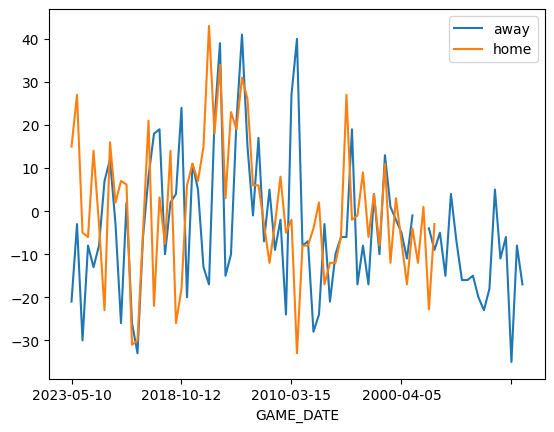

In [ ]:
#now try plot the graph of the achievement of this basketball team
# based on the data before

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
games_away.plot(x='GAME_DATE', y='PLUS_MINUS', ax=ax)
games_home.plot(x='GAME_DATE', y='PLUS_MINUS', ax=ax)
ax.legend(["away", "home"])
plt.show()

**MODULE 5 (SIMPLE API - PART 2)**
- about Application Program Interfaces (API) that use some kind of artificial intelligence.
- For example, transcribe an audio file using the Watson Text to Speech API. then, translate the text to a new language using the Watson language-translator API.


API KEYS & ENDPOINTS
- API key is a way to access the API.
- It’s a unique set of characters that the
API used to identify and authorize you.
- Usually your first call to the API includes
the API key.
- This will allow you access to the API.

- In many API’s you may get charged for each call.
- So like your password, you should keep
your API key a secret.

LAB - API
- Random User API
- Fruitvice API

In [ ]:
#1ST example API (Random User)

## 1) Load and use **RandomUser API**,
- using RandomUser() Python library
- Random User Generator is an open-source, free API providing developers with randomly generated users to be used as placeholders for testing purposes.
- This makes the tool similar to Lorem Ipsum, but is a placeholder for people instead of text.
- The API can return multiple results, as well as specify generated user details such as gender, email, image, username, address, title, first and last name, and more.

In [ ]:
# To start using the API you can install the randomuser library
# by running the pip install command.
!pip install randomuser

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for randomuser: filename=randomuser-1.6-py3-none-any.whl size=5066 sha256=ed272ae56f66f1f335f6d9fc2af442d393dfe9e63b770528592849efdda2ada2
  Stored in directory: /root/.cache/pip/wheels/b8/f3/19/6a938647065b4bb2471a9d063647d14d4fcc3236731f4e2b53
Successfully built randomuser


In [ ]:
from randomuser import RandomUser
import pandas as pd

In [ ]:
#after load the necessary libraries.
#then, we will create a random user object, r.

r = RandomUser()

In [ ]:
#then, using generate_users() function,
# we get a list of random 10 users.

user_list = r.generate_users(10)
user_list

The "Get Methods" functions as per below can generate the required parameters to construct a dataset.

**GET METHODS:**
•	get_cell()
•	get_city()
•	get_dob()
•	get_email()
•	get_first_name()
•	get_full_name()
•	get_gender()
•	get_id()
•	get_id_number()
•	get_id_type()
•	get_info()
•	get_last_name()
•	get_login_md5()
•	get_login_salt()
•	get_login_sha1()
•	get_login_sha256()
•	get_nat()
•	get_password()
•	get_phone()
•	get_picture()
•	get_postcode()
•	get_registered()
•	get_state()
•	get_street()
•	get_username()
•	get_zipcode()


In [ ]:
#For example, to get full name, we call get_full_name() function
name = r.get_full_name()

Let's say we only need 10 users with full names and their email addresses.
- We can write a "for-loop" to print these 10 users.

In [ ]:
for user in user_list:
  print(user.get_full_name()," ",user.get_email())

Gladys Black   gladys.black@example.com
Adeline Franz   adeline.franz@example.com
محیا زارعی   mhy.zraay@example.com
Gauthier Leclercq   gauthier.leclercq@example.com
Fatma Eliçin   fatma.elicin@example.com
علی كامياران   aaly.kmyrn@example.com
Rose Bouchard   rose.bouchard@example.com
Alice White   alice.white@example.com
Buddy Braak   buddy.braak@example.com
Gerald Gibson   gerald.gibson@example.com


In [ ]:
#Exercise: generate photos of the random 5 users
for user in user_list:
  print(user.get_picture())

https://randomuser.me/api/portraits/women/28.jpg
https://randomuser.me/api/portraits/women/25.jpg
https://randomuser.me/api/portraits/women/41.jpg
https://randomuser.me/api/portraits/men/29.jpg
https://randomuser.me/api/portraits/women/88.jpg
https://randomuser.me/api/portraits/men/22.jpg
https://randomuser.me/api/portraits/women/20.jpg
https://randomuser.me/api/portraits/women/25.jpg
https://randomuser.me/api/portraits/men/45.jpg
https://randomuser.me/api/portraits/men/89.jpg


To generate a table with information about the users, we can write a function containing all desirable parameters.
- For example, name, gender, city, etc. The parameters will depend on the requirements of the test to be performed.
- We call the Get Methods, listed at the beginning of this notebook. Then, we return pandas dataframe with the users.

In [ ]:
#to generate table with information of users

def get_users():
  new_user = []

  for user in RandomUser.generate_users(10):
    new_user.append({"Name":user.get_full_name(),"Gender":user.get_gender(),
                     "City":user.get_city(),"State":user.get_state(),
                     "Email":user.get_email(),"Gender":user.get_gender(),
                     "DOB":user.get_dob(),"Picture":user.get_picture()
                     })
  return pd.DataFrame(new_user)

In [ ]:
get_users()

,Name,Gender,City,State,Email,DOB,Picture
0,Katherine Stephens,female,Pittsburgh,Texas,katherine.stephens@example.com,1992-10-16T12:15:34.744Z,https://randomuser.me/api/portraits/women/55.jpg
1,Ceyhan Koç,female,Afyonkarahisar,Aksaray,ceyhan.koc@example.com,1964-10-02T04:54:15.092Z,https://randomuser.me/api/portraits/women/51.jpg
2,Enis Meunier,male,Wald (Ar),Vaud,enis.meunier@example.com,1998-08-25T05:32:19.800Z,https://randomuser.me/api/portraits/men/70.jpg
3,Kübra Hamzaoğlu,female,Ağrı,Erzincan,kubra.hamzaoglu@example.com,1961-10-26T22:38:17.044Z,https://randomuser.me/api/portraits/women/58.jpg
4,Alexandra Fletcher,female,Westminster,Tyne and Wear,alexandra.fletcher@example.com,1950-03-29T22:10:09.653Z,https://randomuser.me/api/portraits/women/13.jpg
5,Nihal Kıraç,male,Bingöl,Bayburt,nihal.kirac@example.com,1985-08-18T02:18:32.338Z,https://randomuser.me/api/portraits/men/5.jpg
6,Cassandra Gaillard,female,Versailles,Ariège,cassandra.gaillard@example.com,1952-03-05T02:55:18.867Z,https://randomuser.me/api/portraits/women/52.jpg
7,علی حیدری,male,اراک,خراسان شمالی,aaly.hydry@example.com,1966-11-30T18:40:49.711Z,https://randomuser.me/api/portraits/men/55.jpg
8,Toni Parker,female,Melbourne,Queensland,toni.parker@example.com,1947-06-30T10:58:22.373Z,https://randomuser.me/api/portraits/women/17.jpg
9,Zilena Moreira,female,Paranaguá,Paraná,zilena.moreira@example.com,1970-11-09T14:24:46.987Z,https://randomuser.me/api/portraits/women/35.jpg


In [ ]:
df1 = pd.DataFrame(get_users())
#Now we have a pandas dataframe that can be used for any testing purposes.

# **2) Load and use Fruitvice API**
- using requests Python library
- second example of simple API we will use in this notebook is Fruitvice application
- The Fruitvice API webservice which provides data for all kinds of fruit!
- You can use Fruityvice to find out interesting information about fruit and educate yourself. The webservice is completely free to use and contribute to.

- Another, more common way to use APIs, is through requests library.
- The next lab, Requests and HTTP, will contain more information about requests.

In [ ]:
#importing all required libraries.
!pip install requests
import requests
import json


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#We will obtain the fruitvice API data using requests.get("url") function.
#The data is in a json format.

data = requests.get("https://fruityvice.com/api/fruit/all")

In [ ]:
#We will retrieve results using json.loads() function.
results = json.loads(data.text)

In [ ]:
#then, convert json data into pandas dataframe
pd.DataFrame(results)

,name,id,family,order,genus,nutritions
0,Persimmon,52,Ebenaceae,Rosales,Diospyros,"{'calories': 81, 'fat': 0.0, 'sugar': 18.0, 'c..."
1,Strawberry,3,Rosaceae,Rosales,Fragaria,"{'calories': 29, 'fat': 0.4, 'sugar': 5.4, 'ca..."
2,Banana,1,Musaceae,Zingiberales,Musa,"{'calories': 96, 'fat': 0.2, 'sugar': 17.2, 'c..."
3,Tomato,5,Solanaceae,Solanales,Solanum,"{'calories': 74, 'fat': 0.2, 'sugar': 2.6, 'ca..."
4,Pear,4,Rosaceae,Rosales,Pyrus,"{'calories': 57, 'fat': 0.1, 'sugar': 10.0, 'c..."
5,Durian,60,Malvaceae,Malvales,Durio,"{'calories': 147, 'fat': 5.3, 'sugar': 6.75, '..."
6,Blackberry,64,Rosaceae,Rosales,Rubus,"{'calories': 40, 'fat': 0.4, 'sugar': 4.5, 'ca..."
7,Lingonberry,65,Ericaceae,Ericales,Vaccinium,"{'calories': 50, 'fat': 0.34, 'sugar': 5.74, '..."
8,Kiwi,66,Actinidiaceae,Struthioniformes,Apteryx,"{'calories': 61, 'fat': 0.5, 'sugar': 9.0, 'ca..."
9,Lychee,67,Sapindaceae,Sapindales,Litchi,"{'calories': 66, 'fat': 0.44, 'sugar': 15.0, '..."


The result is in a nested json format.
- The 'nutrition' column contains multiple subcolumns,
- so the data needs to be 'flattened' or normalized.

In [ ]:
#to normalized the dataframe by using json_normalize() function
df2 = pd.json_normalize(results)
df2

,name,id,family,order,genus,nutritions.calories,nutritions.fat,nutritions.sugar,nutritions.carbohydrates,nutritions.protein
0,Persimmon,52,Ebenaceae,Rosales,Diospyros,81,0.00,18.00,18.00,0.00
1,Strawberry,3,Rosaceae,Rosales,Fragaria,29,0.40,5.40,5.50,0.80
2,Banana,1,Musaceae,Zingiberales,Musa,96,0.20,17.20,22.00,1.00
3,Tomato,5,Solanaceae,Solanales,Solanum,74,0.20,2.60,3.90,0.90
4,Pear,4,Rosaceae,Rosales,Pyrus,57,0.10,10.00,15.00,0.40
5,Durian,60,Malvaceae,Malvales,Durio,147,5.30,6.75,27.10,1.50
6,Blackberry,64,Rosaceae,Rosales,Rubus,40,0.40,4.50,9.00,1.30
7,Lingonberry,65,Ericaceae,Ericales,Vaccinium,50,0.34,5.74,11.30,0.75
8,Kiwi,66,Actinidiaceae,Struthioniformes,Apteryx,61,0.50,9.00,15.00,1.10
9,Lychee,67,Sapindaceae,Sapindales,Litchi,66,0.44,15.00,17.00,0.80


In [ ]:
#Let's see if we can extract some information from this dataframe.
#Perhaps, we need to know the 'family' and 'genus' of a cherry.

cherry = df2.loc[df2["name"]=='Cherry']

In [ ]:
print (cherry.iloc[0]['family'])
print (cherry.iloc[0]['genus'])

Rosaceae
Prunus


In [ ]:
#find out how many calories are contained in a banana
banana = df2.loc[df2["name"]=='Banana']
print (banana.iloc[0]['nutritions.calories'])

96


3rd Example API
- Dogs (Based on the Stanford Dogs Dataset)

In [ ]:
#Using requests.get("url") function, load your data from API website
data2 = requests.get("https://cataas.com//api/cats")

In [ ]:
#We will retrieve results using json.loads() function.
results2 = json.loads(data2.text)

In [ ]:
#convert json data into pandas data frame.
df_cat = pd.DataFrame(results2)
df_cat

,_id,tags,owner,createdAt,updatedAt
0,rV1MVEh0Af2Bm4O0,"[kitten, several, gif]",null,Sun May 01 2022 20:57:11 GMT+0000 (Coordinated...,Tue Oct 11 2022 07:52:32 GMT+0000 (Coordinated...
1,ZHrXPVRJniYPR6pp,[gif],null,Wed Jun 01 2022 22:29:22 GMT+0000 (Coordinated...,Tue Oct 11 2022 07:52:32 GMT+0000 (Coordinated...
2,2VgBUv9MaBwk5qnK,[manspreading],null,Mon Oct 03 2022 07:59:01 GMT+0000 (Coordinated...,Tue Oct 11 2022 07:52:32 GMT+0000 (Coordinated...
3,2bPYDRuvU70sbgja,"[closed eyes, sleepy, bed]",LeBonk,Sun Sep 11 2022 00:27:05 GMT+0000 (Coordinated...,Tue Oct 11 2022 07:52:32 GMT+0000 (Coordinated...
4,AYJNTBAktmH3Q7ka,[gif],null,Sun May 01 2022 20:54:14 GMT+0000 (Coordinated...,Tue Oct 11 2022 07:52:32 GMT+0000 (Coordinated...
5,LTxlBUdATocntNid,[],null,Thu Jun 30 2022 06:05:15 GMT+0000 (Coordinated...,Tue Oct 11 2022 07:52:32 GMT+0000 (Coordinated...
6,MBpd0f7cDU5EwhZ9,"[tuxedo, vending machine, stuck, glass, trapped]",LeBonk,Sun Sep 11 2022 00:25:56 GMT+0000 (Coordinated...,Tue Oct 11 2022 07:52:32 GMT+0000 (Coordinated...
7,MkRxexGVMQzEoN73,[],null,Wed May 18 2022 07:06:08 GMT+0000 (Coordinated...,Tue Oct 11 2022 07:52:32 GMT+0000 (Coordinated...
8,N6pTLrClzF83df8t,"[norwegian forest cat, daisy, gaming, pc]",LeBonk,Sun Sep 11 2022 00:30:31 GMT+0000 (Coordinated...,Tue Oct 11 2022 07:52:32 GMT+0000 (Coordinated...
9,Rn6xqsiHb9B7qgLw,"[small cat, brazilian, brazilian cat, brasilei...",ricardo.ricardo815,Wed Sep 28 2022 02:36:22 GMT+0000 (Coordinated...,Tue Oct 11 2022 07:52:32 GMT+0000 (Coordinated...


In [ ]:
#to normalized the dataframe by using json_normalize() function
df_cat2 = pd.json_normalize(results2)
df_cat2

,_id,tags,owner,createdAt,updatedAt
0,rV1MVEh0Af2Bm4O0,"[kitten, several, gif]",null,Sun May 01 2022 20:57:11 GMT+0000 (Coordinated...,Tue Oct 11 2022 07:52:32 GMT+0000 (Coordinated...
1,ZHrXPVRJniYPR6pp,[gif],null,Wed Jun 01 2022 22:29:22 GMT+0000 (Coordinated...,Tue Oct 11 2022 07:52:32 GMT+0000 (Coordinated...
2,2VgBUv9MaBwk5qnK,[manspreading],null,Mon Oct 03 2022 07:59:01 GMT+0000 (Coordinated...,Tue Oct 11 2022 07:52:32 GMT+0000 (Coordinated...
3,2bPYDRuvU70sbgja,"[closed eyes, sleepy, bed]",LeBonk,Sun Sep 11 2022 00:27:05 GMT+0000 (Coordinated...,Tue Oct 11 2022 07:52:32 GMT+0000 (Coordinated...
4,AYJNTBAktmH3Q7ka,[gif],null,Sun May 01 2022 20:54:14 GMT+0000 (Coordinated...,Tue Oct 11 2022 07:52:32 GMT+0000 (Coordinated...
5,LTxlBUdATocntNid,[],null,Thu Jun 30 2022 06:05:15 GMT+0000 (Coordinated...,Tue Oct 11 2022 07:52:32 GMT+0000 (Coordinated...
6,MBpd0f7cDU5EwhZ9,"[tuxedo, vending machine, stuck, glass, trapped]",LeBonk,Sun Sep 11 2022 00:25:56 GMT+0000 (Coordinated...,Tue Oct 11 2022 07:52:32 GMT+0000 (Coordinated...
7,MkRxexGVMQzEoN73,[],null,Wed May 18 2022 07:06:08 GMT+0000 (Coordinated...,Tue Oct 11 2022 07:52:32 GMT+0000 (Coordinated...
8,N6pTLrClzF83df8t,"[norwegian forest cat, daisy, gaming, pc]",LeBonk,Sun Sep 11 2022 00:30:31 GMT+0000 (Coordinated...,Tue Oct 11 2022 07:52:32 GMT+0000 (Coordinated...
9,Rn6xqsiHb9B7qgLw,"[small cat, brazilian, brazilian cat, brasilei...",ricardo.ricardo815,Wed Sep 28 2022 02:36:22 GMT+0000 (Coordinated...,Tue Oct 11 2022 07:52:32 GMT+0000 (Coordinated...


This page contains list of public API
(if u need more practice, can try for free!!)

https://github.com/public-apis/public-apis#animals
